In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

from IPython.display import Markdown

# PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs ($x$) and outputs ($y$) of a model, as well as the model’s parameters (weights).

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. 

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html)

In [12]:
a = np.array([[1,2],[3,4]])
t1 = torch.tensor(a)
t2 = torch.from_numpy(a)

t3 = torch.tensor([[1,2]])

print(t3.dtype)
t4 = torch.tensor([[2,3]], dtype=torch.float16)
#print(t4.dtype)

t5 = torch.ones_like(t3)

#print(t5)

torch.int64


## Pytorch AutoGrad

$ f = x^2 + 3x + 1$

$ \frac{df}{dx} = 2x + 3$


In [13]:
x = torch.tensor([2.0], requires_grad=True)
z = torch.tensor([5.0], requires_grad=True)
y = x ** 2 + 3 * x + 1 + z**2
y.backward()
print(x.grad) # gradient of y w.r.t x at x=2
print(z.grad)

tensor([7.])
tensor([10.])


## Perceptron
Build a perceptron featuring two inputs $(x_1, x_2)$ and a single output. 

Initialize all weights ($𝑤_0$, $𝑤_2$, $𝑤_3$) to 1. 

Take a training data point, $x_1=4$, $x_2=-1$, and $y=1$. 

Employ the backpropagation algorithm to demonstrate how this neural network evolves during the processing of the given training example. Set the learning rate $\alpha$ to 0.5 and utilize the squared loss function.

---

**Given values:**
$
W =
\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}, \quad
\mathbf{x} =
\begin{bmatrix} 1 \\ 4 \\ -1 \end{bmatrix}, \quad
y = 1, \quad \alpha = 0.5
$

**Forward pass:**
$
h = W^T \mathbf{x}
$

$
h = (1 \times 1) + (1 \times 4) + (1 \times -1) = 1 + 4 - 1 = 4
$

**Backward pass:**
$
J =  (h - y)^2
$

$
J =  (4 - 1)^2 = (3)^2 = 9 
$

$
\frac{\partial J}{\partial W} = 2(h-y) \cdot \mathbf{x}
$

**Weight Update**
$
W \leftarrow W - \alpha \frac{\partial L}{\partial W}
$

$
\mathbf{W} \leftarrow
\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
- 0.5 \times
\begin{bmatrix} 6 \\ 24 \\ -6 \end{bmatrix}
$


$
\mathbf{W} =
\begin{bmatrix} -2 \\ -11 \\ 4 \end{bmatrix}
$



In [11]:
x = torch.tensor([1., 4., -1.]) 
y = torch.tensor([1.]) 
w = torch.tensor([1., 1., 1.], requires_grad=True)
h = torch.matmul(w,x)           # 1. forward pass
print(f'Forward Pass, h= {h}')
J = (h-y)**2 # Squared loss
print(f'Loss J={J.item()}')
J.backward()                    # 2. backward pass
print(f'Backward pass, Derivatives= {w.grad}')
w = w - 0.5*w.grad # alpha is 0.5 here   #  3.  Update the weights
print(f'Weights update, w= {w}')

Forward Pass, h= 4.0
Loss J=9.0
Backward pass, Derivatives= tensor([ 6., 24., -6.])
Weights update, w= tensor([ -2., -11.,   4.], grad_fn=<SubBackward0>)


In [14]:
# Using PyTorch Optimizer
x = torch.tensor([[4., -1.]]) 
y = torch.tensor([[1.]]) 

h = nn.Linear(2, 1, bias=True) # h = w x + b

h.weight = nn.Parameter(torch.tensor([[1., 1.]]))  
h.bias = nn.Parameter(torch.tensor([[1.]]))  

optimizer = optim.SGD(h.parameters(), lr = 0.5) # gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

# one iteration of Backpropagation algo
optimizer.zero_grad()
out = h(x)
print(f'Forward Pass, h= {h}')
loss = Cost(out, y)
loss.backward()
print(f'Backward pass, Derivatives= {h.bias.grad} {h.weight.grad}')
optimizer.step()
print(f'Weights update, w= {h.bias.detach().numpy()} {h.weight.detach().numpy()}')

Forward Pass, h= Linear(in_features=2, out_features=1, bias=True)
Backward pass, Derivatives= tensor([[6.]]) tensor([[24., -6.]])
Weights update, w= [[-2.]] [[-11.   4.]]


## Linear Example

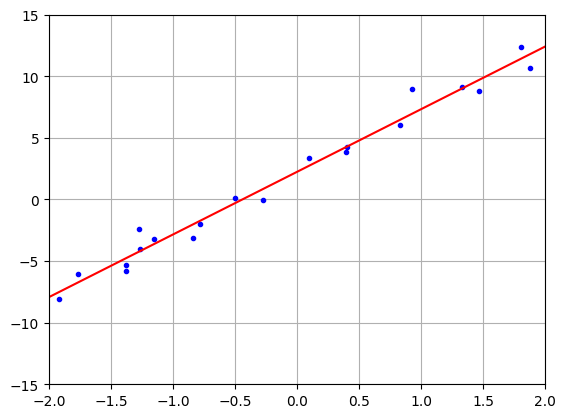

In [94]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))
y_data = 5. * x_data + 2.5 + np.random.randn(20)

X = torch.tensor(x_data[:,np.newaxis], dtype=torch.float32)
Y = torch.tensor(y_data[:,np.newaxis], dtype=torch.float32)

# Linear regression hypothesis using Pytorch
h = nn.Linear(1, 1, bias=True) # h = w x + b

optimizer = optim.SGD(h.parameters(), lr = .1) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

for i in range(50):
    optimizer.zero_grad()
    out = h(X) # forward pass
    loss = Cost(out, Y)
    loss.backward() #backward pass
    optimizer.step() # step

plt.plot(x_data, y_data, 'b.')
x = torch.tensor(np.linspace(-2.0, 2.0, 100).reshape(-1,1), dtype=torch.float32)
y = h(x).detach().numpy()
plt.plot(x,y,'r')
plt.ylim([-15, 15])
plt.xlim([-2, 2])
plt.grid('on')


## Non-Linear Example

We will design a 2-Hidden layers Neural Network to predict the following data

Epoch [500/10000], Loss: 13.6985
Epoch [1000/10000], Loss: 9.8689
Epoch [1500/10000], Loss: 8.4577
Epoch [2000/10000], Loss: 9.1583
Epoch [2500/10000], Loss: 7.2907
Epoch [3000/10000], Loss: 5.9827
Epoch [3500/10000], Loss: 5.0238
Epoch [4000/10000], Loss: 4.4314
Epoch [4500/10000], Loss: 4.7058
Epoch [5000/10000], Loss: 4.3430
Epoch [5500/10000], Loss: 3.8902
Epoch [6000/10000], Loss: 3.7098
Epoch [6500/10000], Loss: 3.2642
Epoch [7000/10000], Loss: 2.9958
Epoch [7500/10000], Loss: 2.7665
Epoch [8000/10000], Loss: 2.6808
Epoch [8500/10000], Loss: 2.5819
Epoch [9000/10000], Loss: 2.3985
Epoch [9500/10000], Loss: 2.2317
Epoch [10000/10000], Loss: 2.2265


Text(0.5, 1.0, 'Synthetic data')

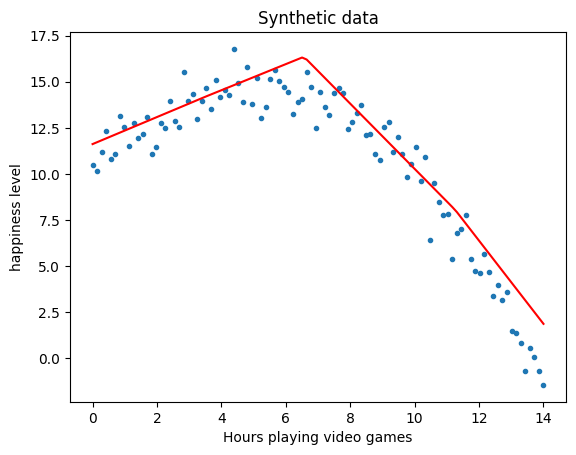

In [96]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness
# Define a neural network
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 6, bias=True)  # Input to hidden layer       
        self.layer2 = nn.Linear(6, 6)  
        self.layer3 = nn.Linear(6, 1)  # Hidden layer to output

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Instantiate the model, define loss function, and optimizer
model = MyModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x) #model.forward(x)
    # Compute the loss
    loss = criterion(y_pred, y)
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


## Plot the results
plt.plot(x,y, '.')
out = model(x)
plt.plot(x,out.detach().numpy(), 'r')
plt.xlabel('Hours playing video games')
plt.ylabel('happiness level')
plt.title('Synthetic data')

# MNIST Image Classification
### 1.  Loading the MNIST dataset

In [2]:
training_data = datasets.MNIST(
    root='~/Downloads/',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='~/Downloads/',
    train=False,
    download=True,
    transform=ToTensor()
)

content = """
The data is contained in the ```training_data.data``` and the labels
in ```training_data.targets```.

You can also access the data using indexing ```training_data[index]```

The ```Dataset``` retrieves our dataset’s features and labels one sample at a time. While training a model, 
we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting

```DataLoader``` is an iterable that abstracts this complexity for us in an easy API.

```train_features, train_labels = next(iter(train_dataloader))```

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
"""

batchsize = 64
train_dataloader = DataLoader(training_data, batch_size=batchsize, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

Markdown(content)


The data is contained in the ```training_data.data``` and the labels
in ```training_data.targets```.

You can also access the data using indexing ```training_data[index]```

The ```Dataset``` retrieves our dataset’s features and labels one sample at a time. While training a model, 
we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting

```DataLoader``` is an iterable that abstracts this complexity for us in an easy API.

```train_features, train_labels = next(iter(train_dataloader))```

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)


### 2.  Create a multiclass logistic regression (softmax) model and train

In [3]:
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = torch.device('mps')

class mnistClassifier(nn.Module):
    def __init__(self):

        super(mnistClassifier, self).__init__()
        self.h = nn.Sequential(
                         nn.Linear(784, 10, bias=True),
                         nn.LogSoftmax(dim=1)
                      )

    def forward(self, x):
        x = self.h(x)
        return x
        
hypothesis = mnistClassifier()

optimizer = optim.SGD(hypothesis.parameters(), lr = .001) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
for epoch in range(10):
    running_loss = 0
    for i, data in enumerate(train_dataloader):
        
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        inputs = inputs.reshape(inputs.shape[0],-1)
        
        optimizer.zero_grad()
        # forward pass
        out = hypothesis(inputs)

        loss = Cost(out, labels)

        # backward pass
        loss.backward()

        # update paramters
        optimizer.step()

        
        running_loss += loss.item()
        
        if i%300 == 0:
            print(f'Epoch {epoch+1}:{i+1} Loss: {loss.item()}')
            
    J_history += [running_loss]

NameError: name 'device' is not defined

### 3. Plot Convergence plot of gradient descent with respect to no of epochs

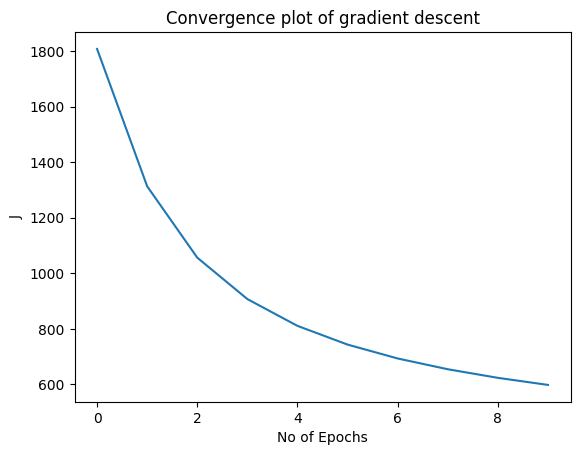

In [102]:
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of Epochs')
plt.ylabel('J')
plt.show()

### 4. Test on a batch of test images and display images with the predicted label

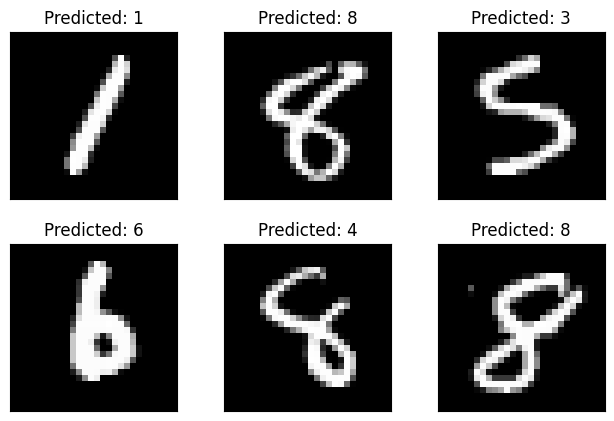

In [103]:
# test on one batch of test data
inputs_im, labels =  next(iter(test_dataloader))
inputs = inputs_im.to(device)
labels = labels.to(device)
inputs = inputs.reshape(inputs.shape[0],-1)
out = hypothesis(inputs)
pr = torch.argmax(out, dim=1) # predicted labels

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    im = torch.squeeze(inputs_im[i].detach(), dim=0).numpy()
    plt.imshow(im, cmap='gray', interpolation='none')
    plt.title("Predicted: {}".format(pr[i]))
    plt.xticks([])
    plt.yticks([])
